<a href="https://colab.research.google.com/github/kadobkina/ship_detection/blob/master/ship_detection_final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
from PIL import Image
import numpy as np
from skimage.metrics import structural_similarity as ssim
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
!pip install tensorflow
!pip install --upgrade tensorflow-hub

In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -r requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init() #check

YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AdHtrGL1W1V7nhXNkzlB")
project = rf.workspace("kadobkina").project("ship-detection-ajhw4")
dataset = project.version(6).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=dd7c646c07b2ba21989773115c8ee26687c134fbcb2bdc2c891179e4b7dbc4d9
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: idna
    Found e

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Ship-Detection-6 in yolov5pytorch:: 100%|██████████| 4178/4178 [00:01<00:00, 3600.63it/s]


In [6]:
!python train.py --img 640 --batch-size 32 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Ship-Detection-6/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_

In [7]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source Ship-Detection-6/test/images --save-txt

detect: weights=['runs/train/exp2/weights/best.pt'], source=Ship-Detection-6/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/200 /content/yolov5/Ship-Detection-6/test/images/test100_jpg.rf.df0772a588b55323cba05e7c3fa08164.jpg: 640x640 1 ship, 11.5ms
image 2/200 /content/yolov5/Ship-Detection-6/test/images/test101_jpg.rf.9dc7adebea8798b37633e41881007ac3.jpg: 640x640 1 ship, 11.6ms
image 3/200 /content/yolov5/Ship-Detection-6/test/images/test102_jpg.rf

## Detected ships on the test data

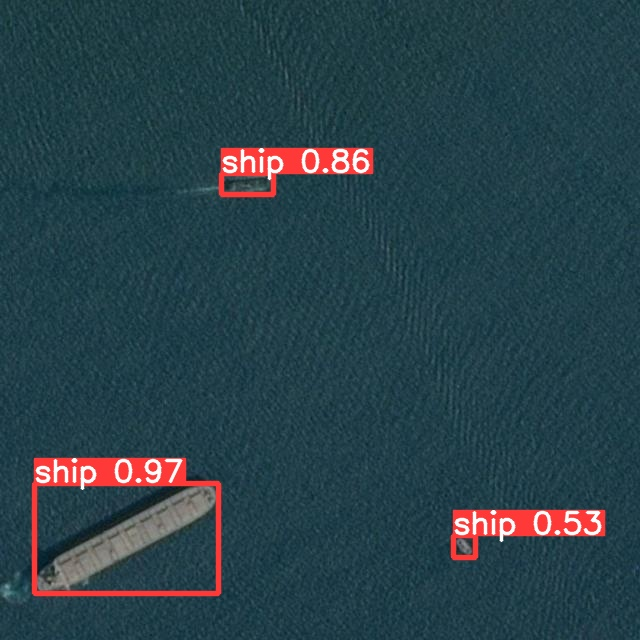

In [14]:
display.Image(filename='runs/detect/exp/test16_jpg.rf.d5c327a8da10e594f80e7dd1d802a004.jpg', width=600)

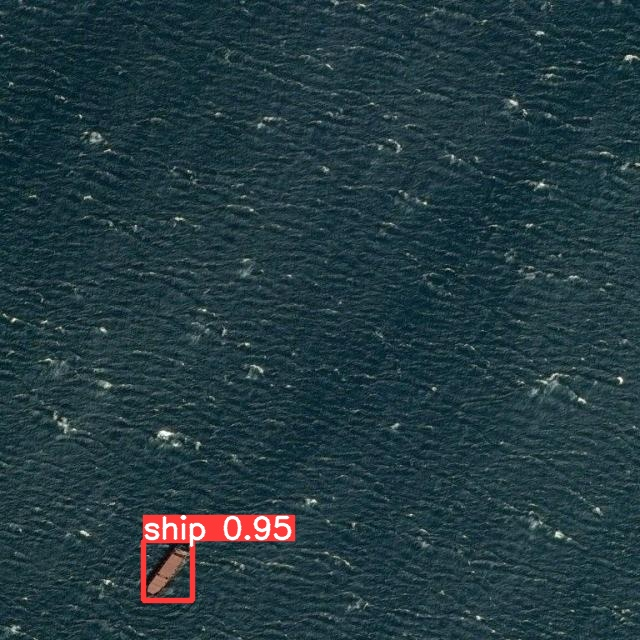

In [15]:
display.Image(filename='runs/detect/exp/test17_jpg.rf.b6407cd33a897d03a7cb3a7288a3ec96.jpg', width=600)

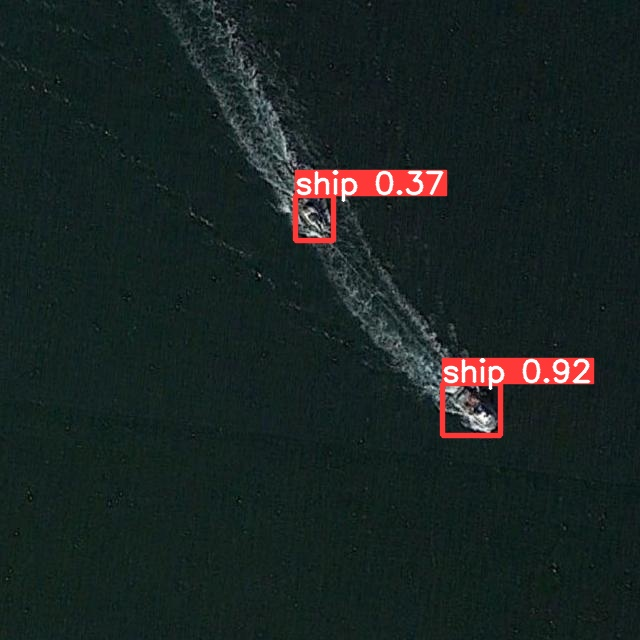

In [17]:
display.Image(filename='runs/detect/exp/test110_jpg.rf.39eb4a5e3fe7b2be2cd280a5a617cb51.jpg', width=600)

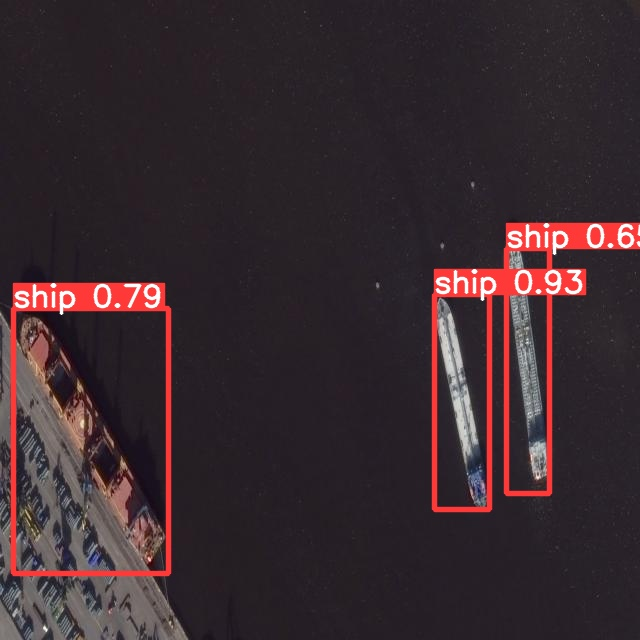

In [18]:
display.Image(filename='runs/detect/exp/test112_jpg.rf.a5de36762f3e46bf0ffdc4895e9ec326.jpg', width=600)

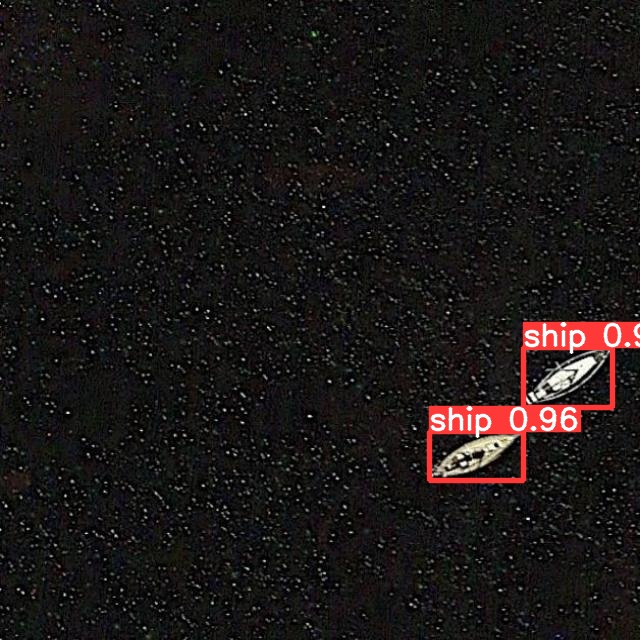

In [19]:
display.Image(filename='runs/detect/exp/test113_jpg.rf.57f686fe333b19e0c356d6ecfc7511d9.jpg', width=600)

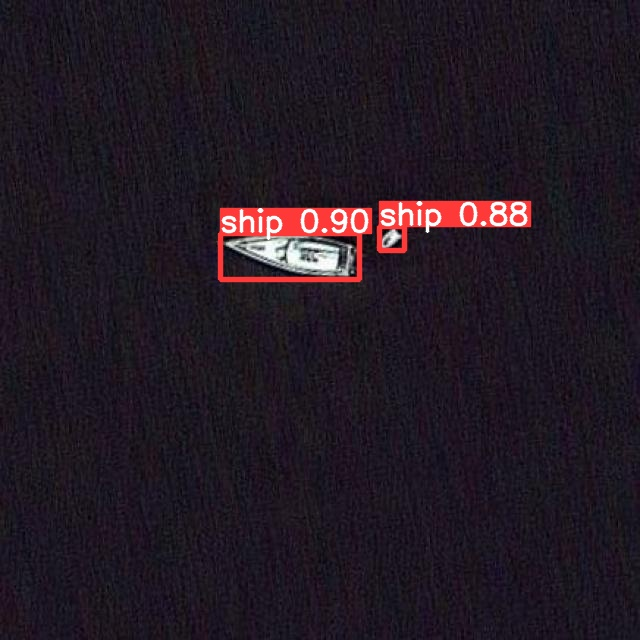

In [20]:
display.Image(filename='runs/detect/exp/test116_jpg.rf.06db111553b0fd6cb62a13af1f1f364a.jpg', width=600)

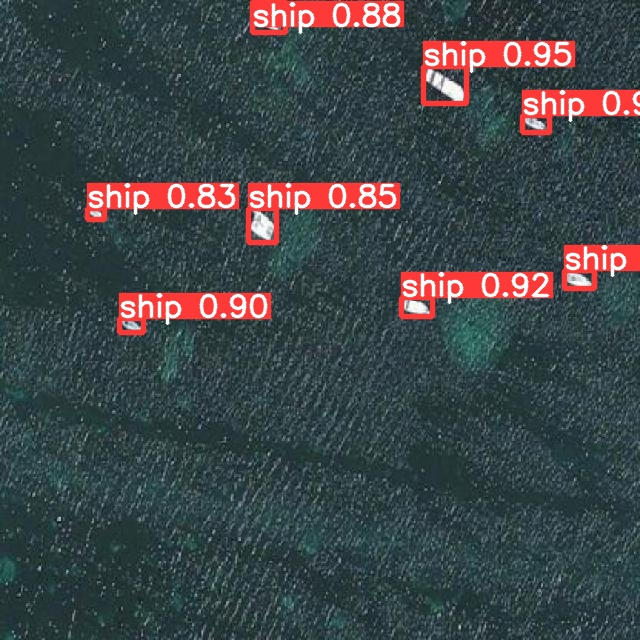

In [21]:
display.Image(filename='runs/detect/exp/test118_jpg.rf.46fc26e45fc28a0251791b0c41b0555d.jpg', width=600)

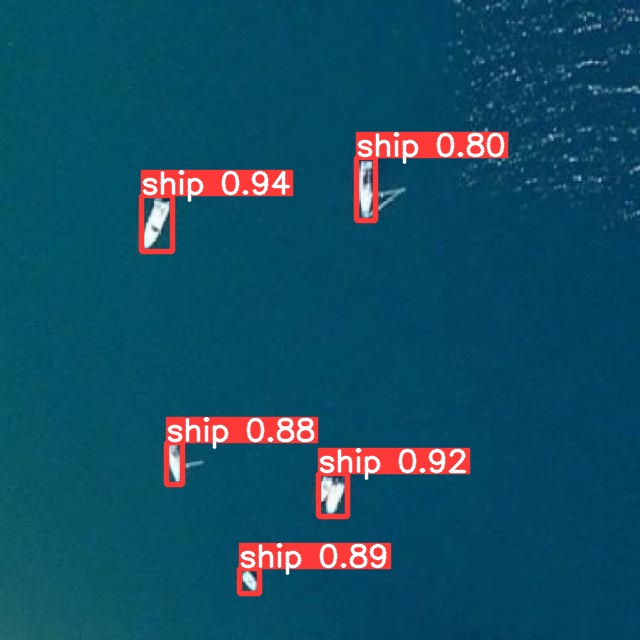

In [22]:
display.Image(filename='runs/detect/exp/test117_jpg.rf.2a59185c0bc7703793e2581f7d5f76ea.jpg', width=600)

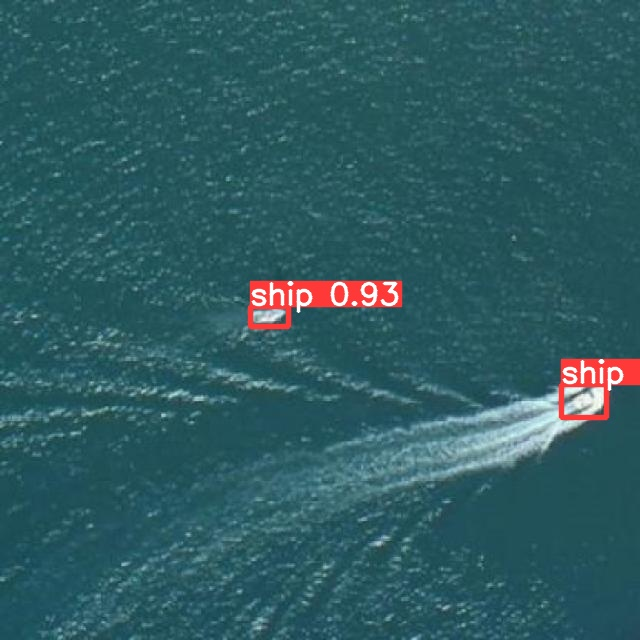

In [23]:
display.Image(filename='runs/detect/exp/test120_jpg.rf.9daae667b48b08a4501b36c165edce27.jpg', width=600)

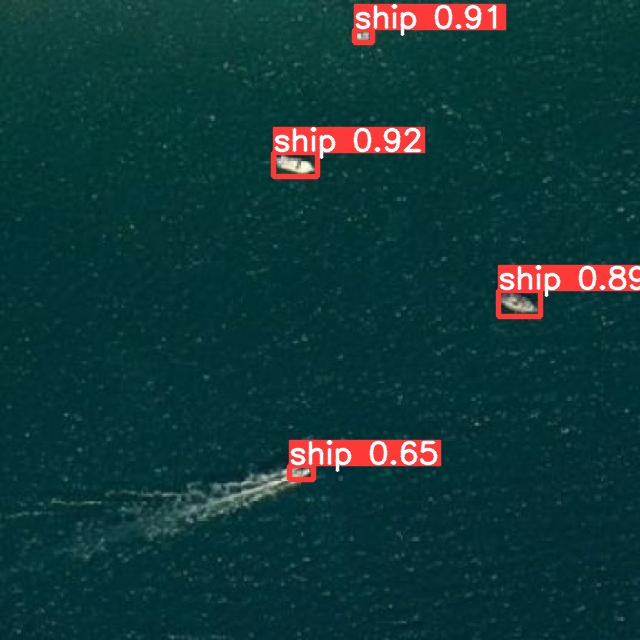

In [24]:
display.Image(filename='runs/detect/exp/test121_jpg.rf.41c8cc36c750ae885f171e77ea402c9d.jpg', width=600)

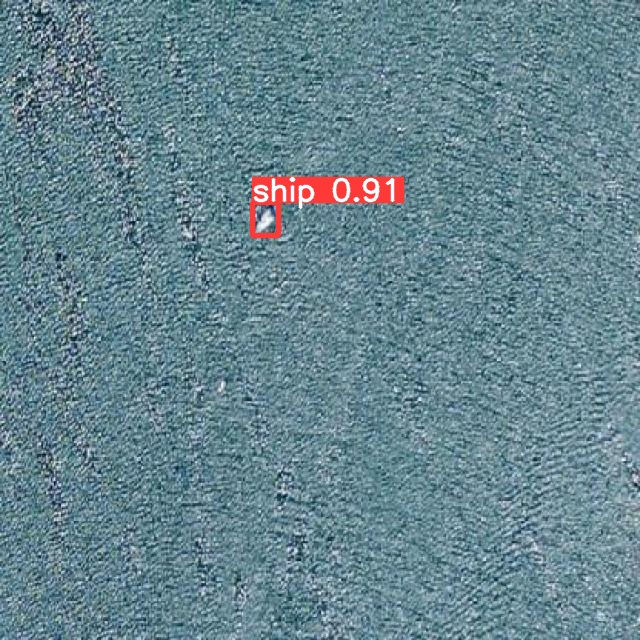

In [25]:
display.Image(filename='runs/detect/exp/test123_jpg.rf.1bb1871225a9fabe70a6bfde66c16ad6.jpg', width=600)

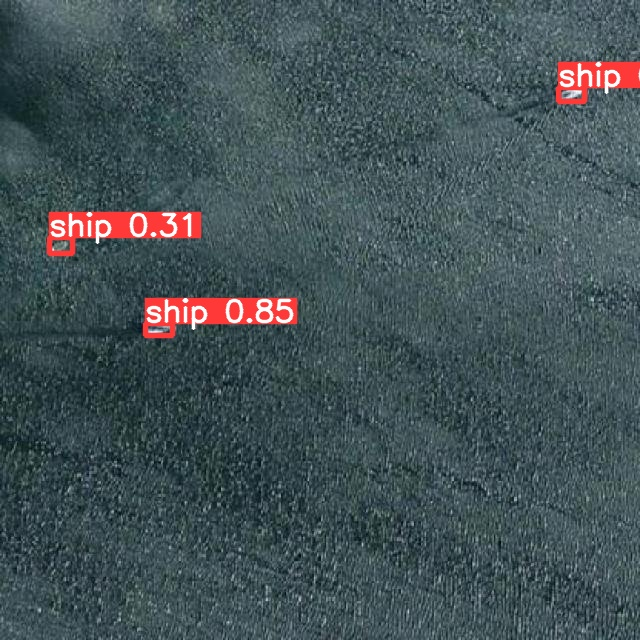

In [27]:
display.Image(filename='runs/detect/exp/test128_jpg.rf.862437de8cdd637106668094689f2e1f.jpg', width=600)

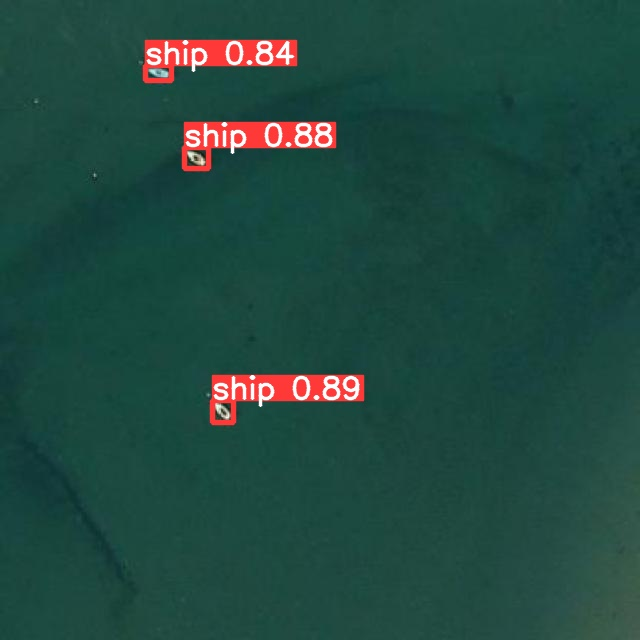

In [28]:
display.Image(filename='runs/detect/exp/test129_jpg.rf.63efeb2d00ddfcde1c5aa75b0b2e49d4.jpg', width=600)

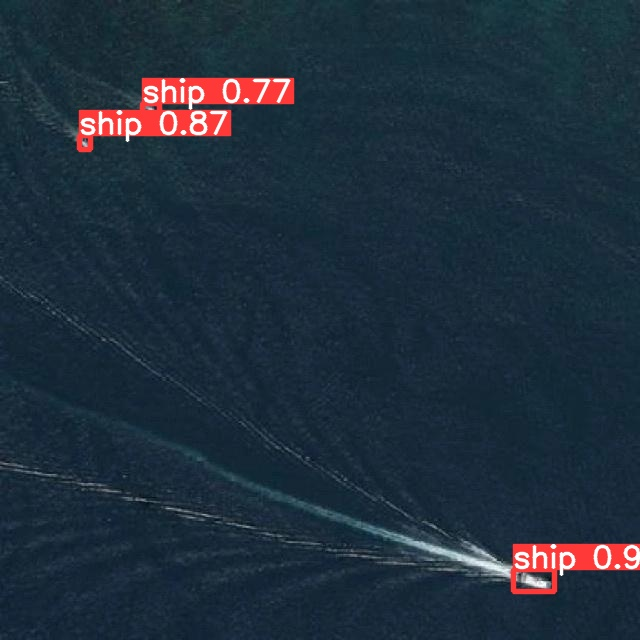

In [29]:
display.Image(filename='runs/detect/exp/test132_jpg.rf.716f1f4a9ef69ebd257d742a7137ecc4.jpg', width=600)

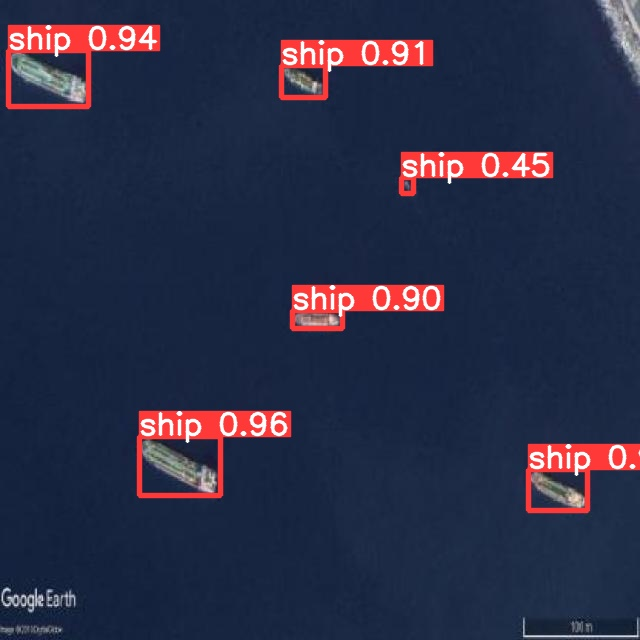

In [30]:
display.Image(filename='runs/detect/exp/test144_jpg.rf.4adb56a0147ad98943481428a3aad507.jpg', width=600)

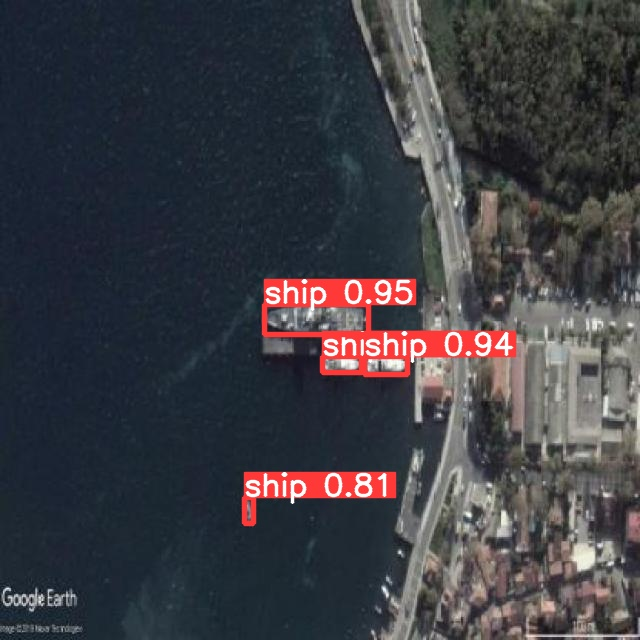

In [31]:
display.Image(filename='runs/detect/exp/test151_jpg.rf.a5605c5710edcda53e89e8e3406a7946.jpg', width=600)

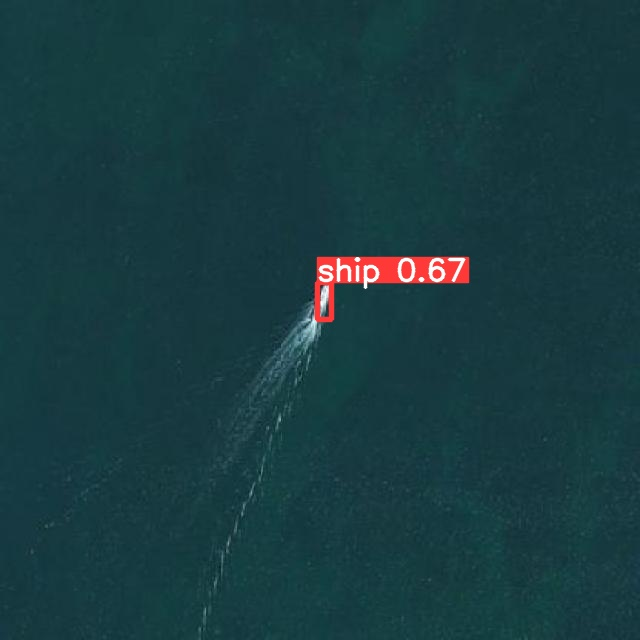

In [32]:
display.Image(filename='runs/detect/exp/test174_jpg.rf.b4826febaa4b186492c368b3ed48bebe.jpg', width=600)



## ---


**Choose an image for measure similarity**

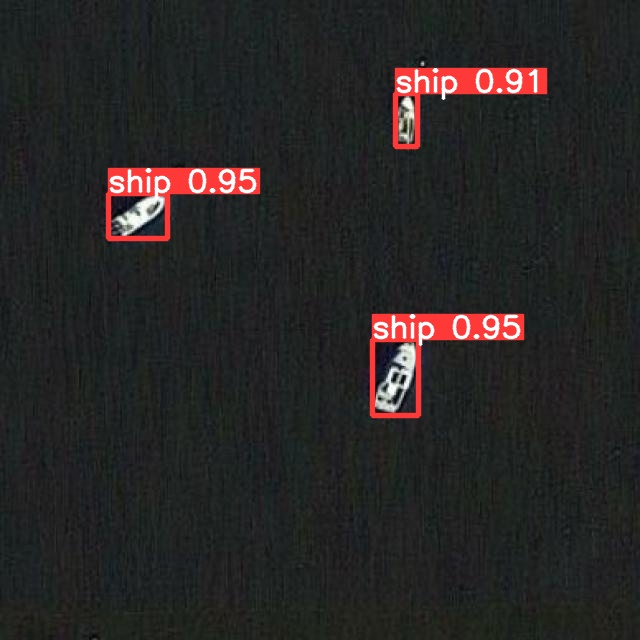

In [58]:
#display.Image(filename='runs/detect/exp/test106_jpg.rf.93942079b955ab189194cbca0949f797.jpg', width=600)

display.Image(filename='runs/detect/exp/test107_jpg.rf.839e16f84b3a793aa7be903411f5a479.jpg', width=600)

#display.Image(filename='runs/detect/exp/test113_jpg.rf.57f686fe333b19e0c356d6ecfc7511d9.jpg', width=600)

#display.Image(filename='runs/detect/exp/test122_jpg.rf.ebf98f3f9575a85d9d7ab59693734f60.jpg', width=600)

In [59]:
#image_label_path = '/content/yolov5/runs/detect/exp/labels/test106_jpg.rf.93942079b955ab189194cbca0949f797.txt'
#image_path = '/content/yolov5/Ship-Detection-6/test/images/test106_jpg.rf.93942079b955ab189194cbca0949f797.jpg'

image_label_path = '/content/yolov5/runs/detect/exp/labels/test107_jpg.rf.839e16f84b3a793aa7be903411f5a479.txt'
image_path = '/content/yolov5/Ship-Detection-6/test/images/test107_jpg.rf.839e16f84b3a793aa7be903411f5a479.jpg'

#image_label_path = '/content/yolov5/runs/detect/exp/labels/test113_jpg.rf.57f686fe333b19e0c356d6ecfc7511d9.txt'
#image_path = '/content/yolov5/Ship-Detection-6/test/images/test113_jpg.rf.57f686fe333b19e0c356d6ecfc7511d9.jpg'

#image_label_path = '/content/yolov5/runs/detect/exp/labels/test122_jpg.rf.ebf98f3f9575a85d9d7ab59693734f60.txt'
#image_path = '/content/yolov5/Ship-Detection-6/test/images/test122_jpg.rf.ebf98f3f9575a85d9d7ab59693734f60.jpg'

## **Image preparation**

In [60]:
# Extraction x,y,weight,height of bounding boxes

f = open(image_label_path, 'r')

coord_bounding_boxes = [] # x,y,w,h of ships on the image
for line in f:
  coord_bounding_boxes.append(line)
f.close()

ships = [] # Without unused symbols
for index_bounding_boxes in range(len(coord_bounding_boxes)):
  ships.append(coord_bounding_boxes[index_bounding_boxes][1:-2].split())
ships

[['0.634375', '0.186719', '0.034375', '0.082812'],
 ['0.214844', '0.336719', '0.0921875', '0.070312'],
 ['0.617188', '0.589063', '0.071875', '0.1187']]

In [61]:
# x,y,w,h relative to actual size and convertation to float
for ship in ships:
  for ind in range(len(ship)):
    if ind % 2 == 0:
      ship[ind] = cv2.imread(image_path).shape[0]*float(ship[ind])
    else:
      ship[ind] = cv2.imread(image_path).shape[1]*float(ship[ind])

ships

[[406.0, 119.50016, 22.0, 52.99968],
 [137.50016, 215.50016, 59.0, 44.99968],
 [395.00032, 377.00032, 46.0, 75.968]]

left, upper - верхний левый угол (x,y)
>
right, lower - нижний правый угол (x,y)

In [62]:
# Convertation x,y,w,h to left,upper,right,lower
new_coord_ships = []
for ship in ships:
  (x,y,w,h) = ship

  left = x-w*0.5
  upper = y-h*0.5

  right = x+w*0.5
  lower = y+h*0.5

  new_coord_ships.append([left,upper,right,lower])


new_coord_ships

[[395.0, 93.00031999999999, 417.0, 146.0],
 [108.00016, 193.00032, 167.00016, 238.0],
 [372.00032, 339.01632, 418.00032, 414.98431999999997]]

In [63]:
!mkdir /content/similarity/

mkdir: cannot create directory ‘/content/similarity/’: File exists


In [64]:
# Creation a list of ships within detected bounding boxes
ships_objects_on_image = []

im = Image.open(image_path)
for ship in new_coord_ships:
  ships_objects_on_image.append(im.crop(ship))

for ind_ship in range(len(ships_objects_on_image)):
  ships_objects_on_image[ind_ship].save('/content/similarity/' + str(ind_ship+1) + '.jpg')

## **Ships within detected bounding boxes in the image**

Ship № 1


Ship № 2


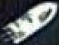

Ship № 3


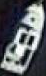

In [65]:
for ind_ship in range(len(ships_objects_on_image)):
  print('Ship №', ind_ship+1)
  ships_objects_on_image[ind_ship].show()



---

**Choose a ship in the image to measure similarity**


In [85]:
ship_reference = input('Input the ship number to measure similarity: ')

Input the ship number to measure similarity: 2


## Computation of the measure similarity using MSE and SSIM

In [86]:
# Path to two images to measure similarity

ship_reference_path = '/content/similarity/' + ship_reference + '.jpg'

images_paths = []
for ind_ship in range(len(ships_objects_on_image)):
  images_paths.append('/content/similarity/' + str(ind_ship+1) + '.jpg')

images_paths

['/content/similarity/1.jpg',
 '/content/similarity/2.jpg',
 '/content/similarity/3.jpg']

In [87]:
# Computation of the mean squared error
def mse(imageA, imageB):
  mse_error = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
  mse_error /= float(imageA.shape[0] * imageA.shape[1])

  return mse_error

In [88]:
# Measuring similarity for two images
def measure_similarity(img1_path, img2_path):
  img1 = cv2.imread(img1_path)
  img2 = cv2.imread(img2_path)

  # Mean dim of the images
  dim = (int(np.mean([img1.shape[0], img2.shape[0]])), int(np.mean([img1.shape[1],img2.shape[1]])))

  # Resizing to mean dim
  img1_resized = cv2.resize(cv2.imread(img1_path), dim)
  img2_resized = cv2.resize(cv2.imread(img2_path), dim)

  #resized =[]
  #for image_filename in os.listdir('/content/similarity/'):
  #  resized.append(cv2.resize(cv2.imread('/content/similarity/'+image_filename), dim))

  # Convertation the images to grayscale
  gray1 = cv2.cvtColor(img1_resized, cv2.COLOR_BGR2GRAY)
  gray2 = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)

  # MSE and SSIM computation
  mse_value = mse(gray1, gray2)   # Mean squared error
  ssim_value = ssim(gray1, gray2) # Structural similarity index measure
  return (mse_value, ssim_value)

# Mean squared error and Structural similarity index measure

In [89]:
for ship_num in range(len(images_paths)):
  MSE, SSIM = measure_similarity(ship_reference_path, images_paths[ship_num])
  print(f'{ship_reference} and {ship_num+1} ships:\n MSE = {MSE}, SSIM = {SSIM} ~ {round(SSIM*100, 2)}%')

2 and 1 ships:
 MSE = 7295.619897959184, SSIM = 0.07667430878845087 ~ 7.67%
2 and 2 ships:
 MSE = 0.0, SSIM = 1.0 ~ 100.0%
2 and 3 ships:
 MSE = 4815.266346153846, SSIM = 0.2543129524790019 ~ 25.43%


# Computation of the Cosine similarity

In [95]:
# Convertation images(ships in the bounding boxes) to tensors and resizing to 224x224(the size of the input images for the Feature vectors of images with MobileNet V2)
tensors_images = []
for ind_ship in range(len(ships_objects_on_image)):
  tensor_image = tf.convert_to_tensor(Image.open('/content/similarity/' + str(ind_ship+1) + '.jpg'))
  tensors_images.append(tf.keras.preprocessing.image.smart_resize(tensor_image, (224,224)))

tensors_images[0].shape

TensorShape([224, 224, 3])

In [96]:
# Extracting feature vectors using the model
features = []
for tensor in tensors_images:
  features.append(hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4', trainable = False)([tensor]))

features[0]

<tf.Tensor: shape=(1, 1280), dtype=float32, numpy=array([[          0,    0.028492,     0.34639, ...,           0,           0,       2.073]], dtype=float32)>

In [97]:
features_reference_ship = [] # List of features of the reference ship (len list = number of detected ships in the image)
features_other_ships = [] # List of features of the other ships (len list = number of detected ships in the image)

for ind_ship in range(len(ships_objects_on_image)):
  features_reference_ship.append(features[int(ship_reference)-1])
  features_other_ships.append(features[ind_ship])

#similarity = tf.keras.losses.cosine_similarity(
#    [features[0], features[0], features[0]],
#    [features[0], features[1], features[2]],
#    axis=-1,
#)

# Computation of the Cosine similarity
similarity = tf.keras.losses.cosine_similarity(
    features_reference_ship,
    features_other_ships,
    axis=-1,
)

similarities = []
for ind in range(len(similarity)):
  similarities.append(tf.math.reduce_sum(similarity[ind]))

similarities

[<tf.Tensor: shape=(), dtype=float32, numpy=-0.7530199>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.99999994>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.9375558>]

In [98]:
np.array(similarities[0])

array(   -0.75302, dtype=float32)

# **Cosine similarity**

In [99]:
for sim in range(len(similarities)):
  print(f'{ship_reference} and {sim+1} ships:\n Cosine similarity = {abs(np.array(similarities[sim]))} ~ {round(abs(np.array(similarities[sim]))*100, 2)}%')

2 and 1 ships:
 Cosine similarity = 0.7530199289321899 ~ 75.3%
2 and 2 ships:
 Cosine similarity = 0.9999999403953552 ~ 100.0%
2 and 3 ships:
 Cosine similarity = 0.9375557899475098 ~ 93.76%


# Remove all ships in the similarity folder if you want to go to a new image with ships

In [ ]:
!rm /content/similarity/*.jpg